In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
acute = pd.read_csv('ahb_cleaned.csv')
chronic = pd.read_csv('chbae_cleaned.csv')

In [3]:
class PreprocessingPipeline:
    def __init__(self, df):
        self.df = df
        self.rename_column()
        self.value_replace()
        

    def rename_column(self):
        new_column_names = ['Age', 'Gender', 'HBsAg (S/Co)', 'Log DNA (IU/mL)', 'HBeAg','Platelets (10^9/L)', 'PT (Sec)', 'INR', 'TB (mg/dl)', 'DB (mg/dl)','AST (IU/L)',
                            'ALT (IU/L)', 'ALT (X ULN)', 'APRI (AST/platelets)','IgM anti-HBc (S/Co)', 'Avidity Index', 'PRE S1 (RR)', 'PRE S2 (RR)','Mortality', 'Treatment']

        try:
            self.df.drop(['No', 'Study ID'], axis=1, inplace=True)
        except:
            pass

        for i, col in enumerate(self.df.columns):
            self.df.rename(columns={col: new_column_names[i]},inplace=True)
        
        print('Column renaming done!')
    
    def value_replace(self, col='HBsAg (S/Co)', values=['>', 'neg']):
        value_indexes = {}
        for value in values:
            value_index = self.df[self.df[col].str.contains(value, na=True)].index
            value_indexes[value] = value_index.values
            self.df.loc[value_index, col] = np.nan

        self.df[col] = self.df[col].astype(float)
        self.df.loc[value_indexes['>'], col] = self.df[col].max()

        print(f'{col} treatment done!')

    def __repr__(self):
        return ''
    



- In the above class PreprocessingPipeline,


- `rename_column()` method will replace all the column with it's appropriate names.
- Initially column title has certain gist like _AHB or _CHBAE for easier understanding.
- And also certain column such as Platelets are named as Plt for ease.
- Most of the columns doesn't mention the unit of values.
- All these will be taken care by rename_column() method.

- `value_replace()`. In this method, we took care of certain inappropriate values such as 'neg' and '>250 IU/ml' etc.
- The neg will be replaced with np.nan.
- And the values with >250 will replaced with HBsAg (S/Co) column's maximum value.




- This class is created to automate the preprocessing task.

# Acute

In [4]:
acute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   No                        57 non-null     int64  
 1   Study ID                  57 non-null     object 
 2   Age_AHB                   57 non-null     int64  
 3   Gender_AHB                57 non-null     object 
 4   HBsAg S/Co                57 non-null     object 
 5   Log DNA IU/mL_AHB         57 non-null     float64
 6   HBeAg_AHB                 57 non-null     object 
 7   Plt in 10^9/L_AHB         56 non-null     float64
 8   PT_AHB                    55 non-null     float64
 9   INR_AHB                   55 non-null     float64
 10  TB_AHB                    57 non-null     float64
 11  DB_AHB                    57 non-null     float64
 12  AST_AHB                   57 non-null     float64
 13  ALT_AHB                   57 non-null     float64
 14  ALT (X ULN)_

## Preprocessing:

In [5]:
PreprocessingPipeline(df=acute)

Column renaming done!
HBsAg (S/Co) treatment done!


In [6]:
acute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   57 non-null     int64  
 1   Gender                57 non-null     object 
 2   HBsAg (S/Co)          56 non-null     float64
 3   Log DNA (IU/mL)       57 non-null     float64
 4   HBeAg                 57 non-null     object 
 5   Platelets (10^9/L)    56 non-null     float64
 6   PT (Sec)              55 non-null     float64
 7   INR                   55 non-null     float64
 8   TB (mg/dl)            57 non-null     float64
 9   DB (mg/dl)            57 non-null     float64
 10  AST (IU/L)            57 non-null     float64
 11  ALT (IU/L)            57 non-null     float64
 12  ALT (X ULN)           57 non-null     float64
 13  APRI (AST/platelets)  56 non-null     float64
 14  IgM anti-HBc (S/Co)   57 non-null     float64
 15  Avidity Index         54 

- Successfully replaced '>250 IU/ml' with max values and 'neg' with null.

### Getting numeric and object cols:

In [7]:
acute_num_cols = [col for col in acute.columns if acute[col].dtype in ['int', 'float']]
acute_obj_cols = [col for col in acute.columns if acute[col].dtype == 'object']

In [8]:
acute_num_cols, len(acute_num_cols)

(['Age',
  'HBsAg (S/Co)',
  'Log DNA (IU/mL)',
  'Platelets (10^9/L)',
  'PT (Sec)',
  'INR',
  'TB (mg/dl)',
  'DB (mg/dl)',
  'AST (IU/L)',
  'ALT (IU/L)',
  'ALT (X ULN)',
  'APRI (AST/platelets)',
  'IgM anti-HBc (S/Co)',
  'Avidity Index',
  'PRE S1 (RR)',
  'PRE S2 (RR)'],
 16)

In [9]:
acute_obj_cols, len(acute_obj_cols)

(['Gender', 'HBeAg', 'Mortality', 'Treatment'], 4)

## Heatmap

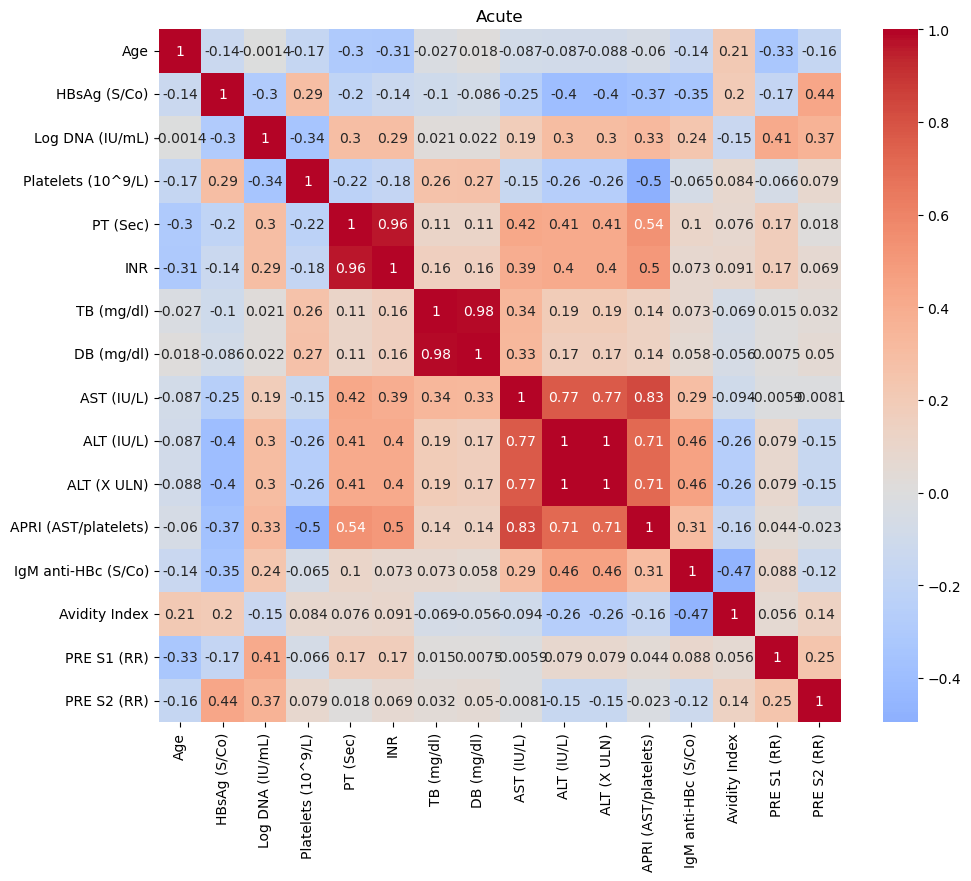

In [10]:
plt.figure(figsize=(11, 9))
acute_corr = acute[acute_num_cols].corr()
sns.heatmap(acute_corr, cmap='coolwarm', annot=True, center=0)
plt.title('Acute');

### Suggested title:

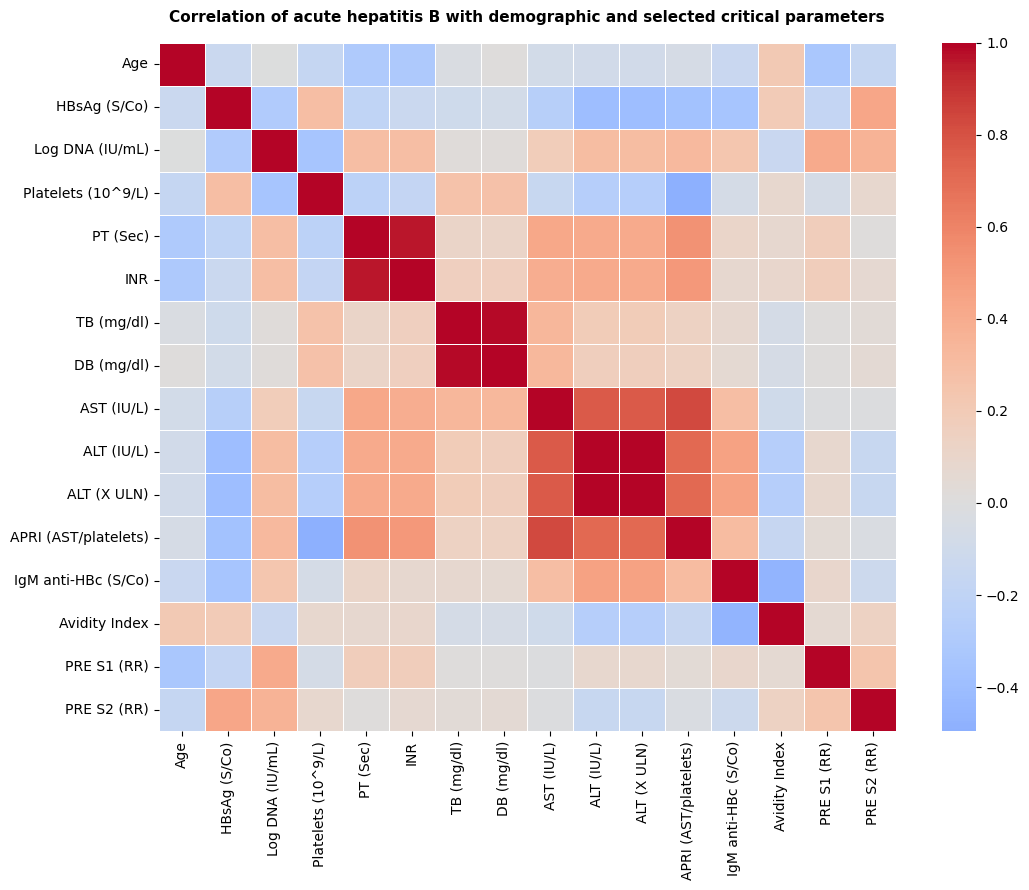

In [11]:
plt.figure(figsize=(11, 9))
acute_corr = acute[acute_num_cols].corr()
sns.heatmap(acute_corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation of acute hepatitis B with demographic and selected critical parameters', fontsize=11, fontweight='bold', pad=15)
plt.tight_layout();

# Chronic

In [12]:
chronic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   No                          47 non-null     int64  
 1   Study ID                    47 non-null     object 
 2   Age_CHBAE                   47 non-null     int64  
 3   Gender_CHBAE                47 non-null     object 
 4   HBsAg S/Co                  47 non-null     object 
 5   Log DNA IU/mL_CHBAE         47 non-null     float64
 6   HBeAg_CHBAE                 47 non-null     object 
 7   Plt in 10^9/L_CHBAE         47 non-null     int64  
 8   PT_CHBAE                    47 non-null     float64
 9   INR_CHBAE                   47 non-null     float64
 10  TB_CHBAE                    47 non-null     float64
 11  DB_CHBAE                    47 non-null     float64
 12  AST_CHBAE                   47 non-null     float64
 13  ALT_CHBAE                   47 non-nu

## Preprocessing:

In [13]:
PreprocessingPipeline(df=chronic)

Column renaming done!
HBsAg (S/Co) treatment done!


### Getting numeric and object cols:

In [14]:
chronic_num_cols = [col for col in chronic.columns if chronic[col].dtype in ['int', 'float']]
chronic_obj_cols = [col for col in chronic.columns if chronic[col].dtype == 'object']

In [15]:
chronic_num_cols, len(chronic_num_cols)

(['Age',
  'HBsAg (S/Co)',
  'Log DNA (IU/mL)',
  'Platelets (10^9/L)',
  'PT (Sec)',
  'INR',
  'TB (mg/dl)',
  'DB (mg/dl)',
  'AST (IU/L)',
  'ALT (IU/L)',
  'ALT (X ULN)',
  'APRI (AST/platelets)',
  'IgM anti-HBc (S/Co)',
  'Avidity Index',
  'PRE S1 (RR)',
  'PRE S2 (RR)'],
 16)

In [16]:
chronic_obj_cols, len(chronic_obj_cols)

(['Gender', 'HBeAg', 'Mortality', 'Treatment'], 4)

## Heatmap

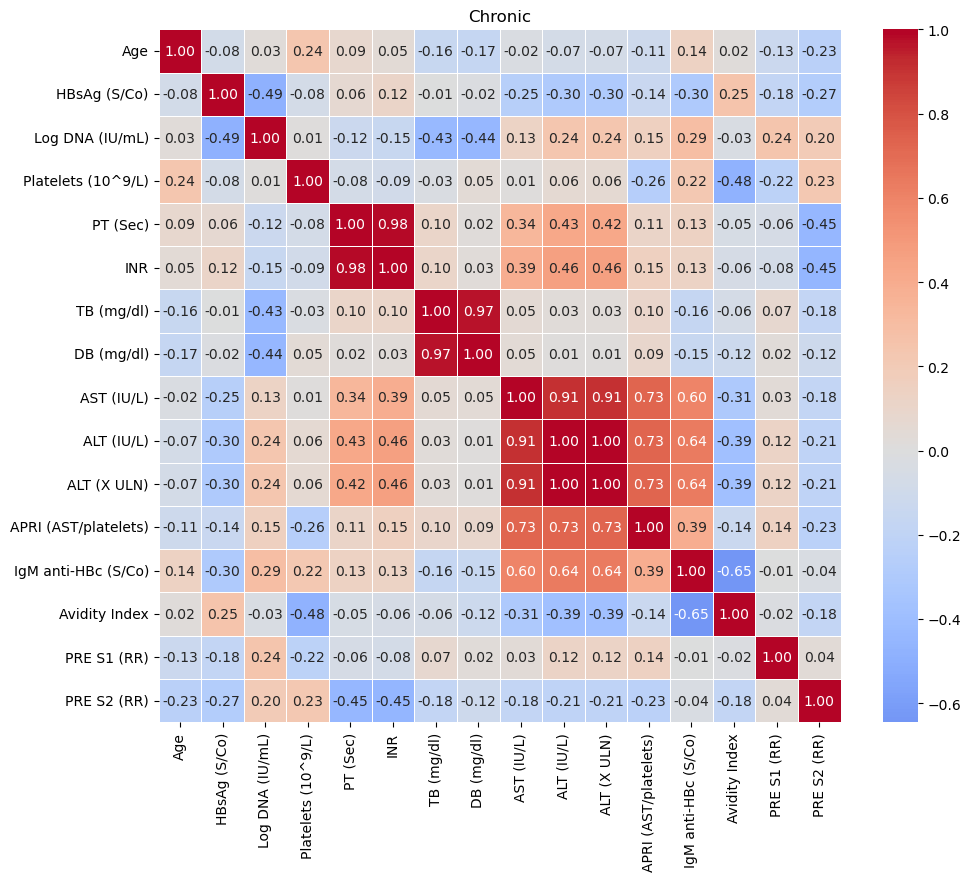

In [17]:
plt.figure(figsize=(11, 9))
chronic_corr = chronic[chronic_num_cols].corr()
sns.heatmap(chronic_corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, center=0)
plt.title('Chronic');

### Suggested title:

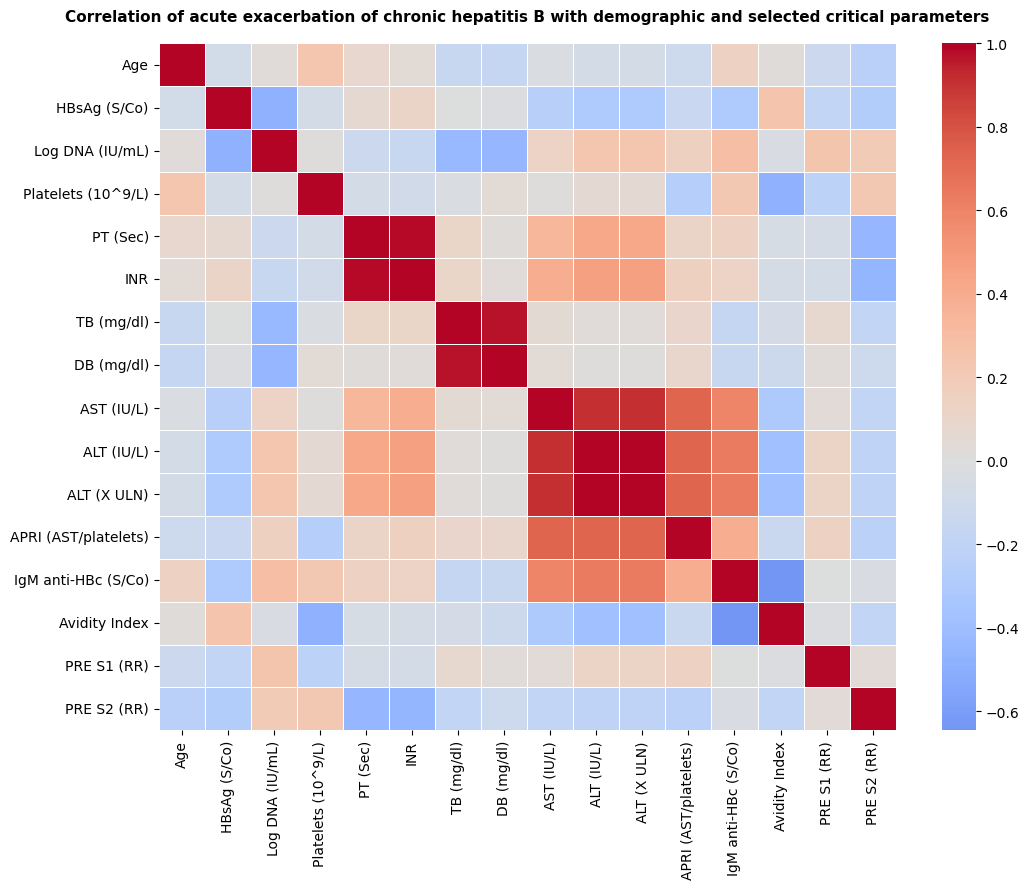

In [18]:
plt.figure(figsize=(11, 9))
chronic_corr = chronic[chronic_num_cols].corr()
sns.heatmap(chronic_corr, cmap='coolwarm', linewidths=0.5, center=0)
plt.title('Correlation of acute exacerbation of chronic hepatitis B with demographic and selected critical parameters', fontsize=11, fontweight='bold', pad=16)
plt.tight_layout();